In [5]:
import pandas as pd
import matplotlib.pyplot as plt

helth_df = pd.read_csv("data.csv")
total_countries =helth_df.groupby(['Indicator Name']).sum(["1960"]).sort_values(["1960"],ascending=False)
total_countries = total_countries.T.iloc[15:]
only_hp_params = total_countries[['% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
                                  'Literacy rate, adult male (% of males ages 15 and above)','Urban population','Rural population']] 

Basic Template for a possible dual axis chart that I stole (kinda).

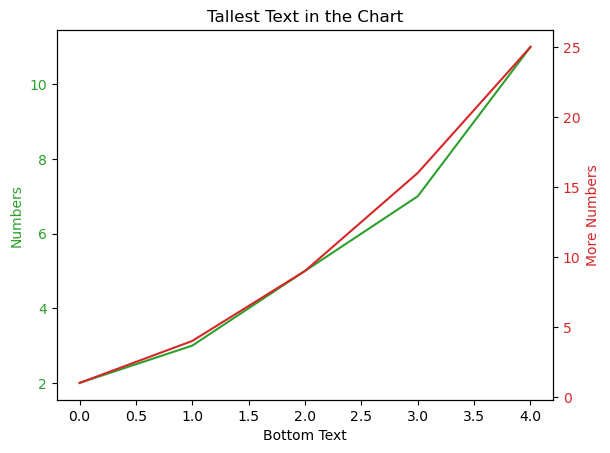

In [3]:
def dual_axis_graph(x, y1, y2, x_label='X-axis', y1_label='Y1-axis', y2_label='Y2-axis', title='Dual Axis Graph'):
    fig, ax1 = plt.subplots()

    # first var on y axis
    color = 'tab:green'
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y1_label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    #second y-axis same x-axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(y2_label, color=color)
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(title) #Title here
    plt.show()

# Variables that can change
x = range(5)
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 9, 16, 25]

dual_axis_graph(x, y1, y2, x_label='Bottom Text', y1_label='Numbers', y2_label='More Numbers', title='Tallest Text in the Chart')

Taking the original CSV and tried to organize it, Data did not isolate only the columns I wanted at first kept trying to filter out null data, was just erasing everything. Kept it at this state.

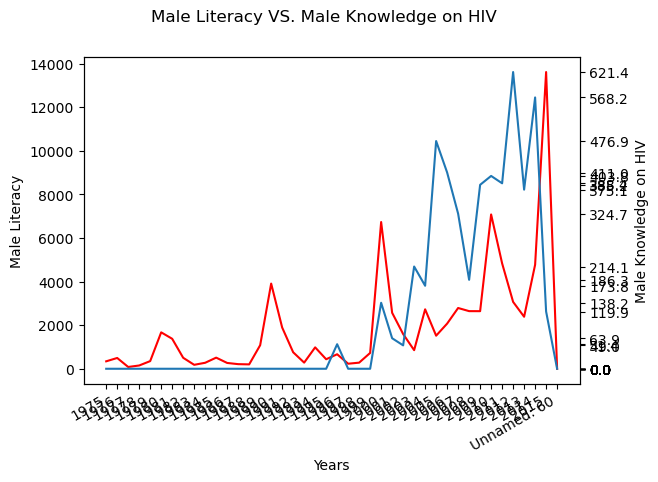

In [10]:
fig, ax = plt.subplots()

fig.autofmt_xdate()
fig.suptitle('Male Literacy VS. Male Knowledge on HIV')
years = only_hp_params.index.tolist()
male_literacy = only_hp_params['Literacy rate, adult male (% of males ages 15 and above)'].tolist()
knowledge = only_hp_params['% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'].tolist()
ax_twin = ax.twinx()
ax_twin.plot(years, knowledge, label='Male Knowledge of HIV')
ax.plot(years, male_literacy,color='red', label='Male Literacy')
ax.set_ylabel('Male Literacy')
ax.set_xlabel('Years')
ax_twin.set_ylabel('Male Knowledge on HIV')
ax_twin.set_yticks(knowledge)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax_twin.get_legend_handles_labels()